In [9]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

Bifurcation diagram

In [10]:
bT = pd.read_table("b.mu", skiprows=17, sep='\\s+', header=None)
bT = bT.apply(pd.to_numeric, errors='coerce')

In [11]:
fl = pd.read_table("s.mu", nrows=0, sep='\\s+')
lst = list(fl)
con = [float(x) for x in lst]
con = [int(x) for x in con]
ibr = int(con[0]) #the index of the branch
ntot = con[1] #the index of the point
itp = con[2] #the type of point
lab = con[3] #the label of the point
nfpr = con[4] #the number of free parameters used in the computation
isw = con[5] #the value of isw used in the computation
ntpl = con[6] #the number of points in the time interval [0,1]
nar = con[7] #the number of values written per point
nrowpr = con[8] #the number of lines printed following the identifying line
ntst = con[9] #the number of time intervals used in the discretization
ncol = con[10] #the number of collocation points used
nparx = con[11] #the dimension of the array par

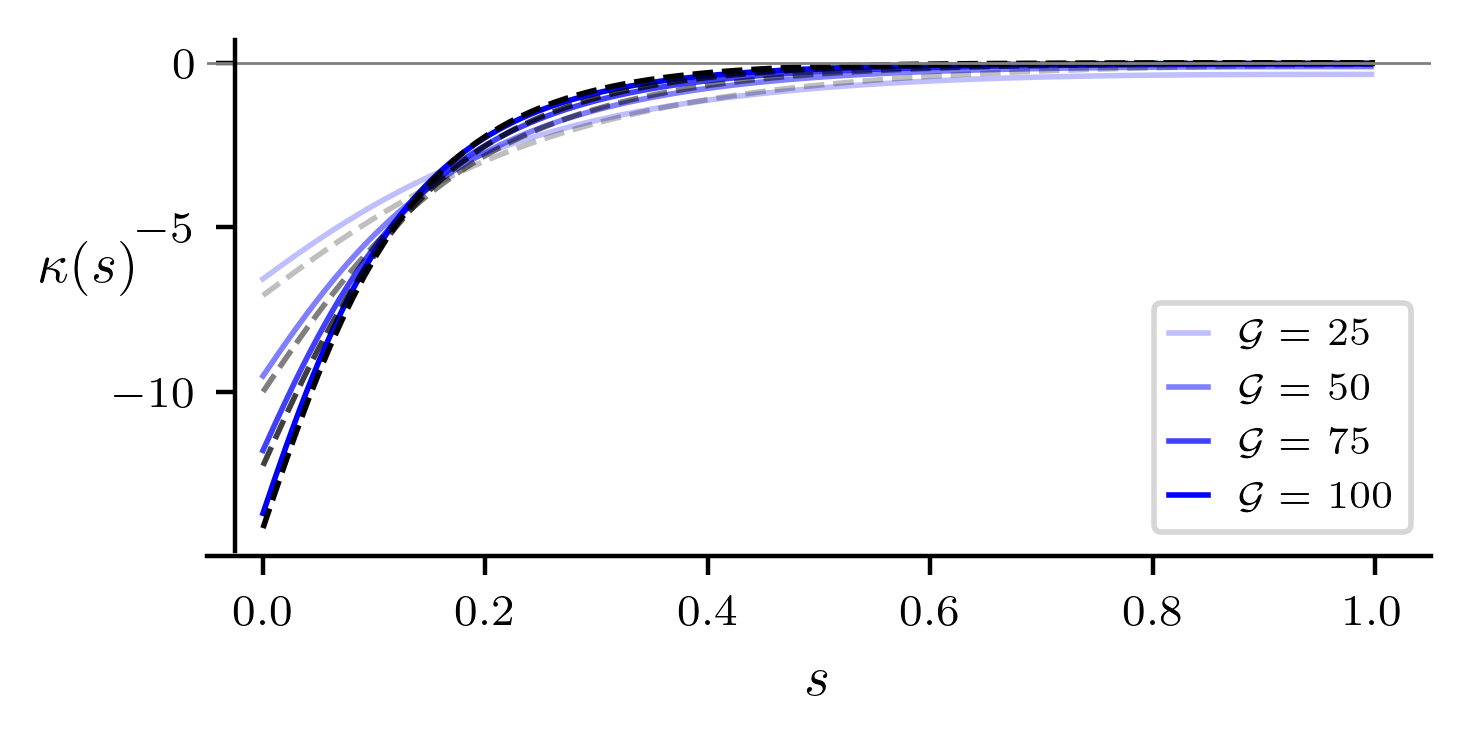

In [12]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
params = {'text.usetex': True, 'text.latex.preamble': r'\usepackage{amsmath}', 'text.latex.preamble': r'\usepackage{bm}'}
plt.rcParams.update(params)

axis_label_size = 10
tick_size = 8
legend_size = 7
line_thickness = 1.0

def curv(s, G):
    s0 = 2 * np.arctanh(np.tan(np.pi/8))
    y = -2 * np.sqrt(G) * (1/np.cosh((s*np.sqrt(G)+s0)/2)**2)/(1+np.tanh((s*np.sqrt(G)+s0)/2)**2)
    return y                                      

fig = plt.figure(figsize = (9.6/2.54,5/2.54), dpi = 400)
ax = plt.gca()
legend_array = []
array_points = [50,100,150,201]
xval = np.linspace(0,1,100)
ii = 1
for ind in array_points:
    df1 = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ax.plot(df1[5].tolist(), df1[2].tolist(), clip_on=False, color = "blue", alpha = ii/len(array_points), linewidth = line_thickness)
    legend_array.append(r'$\mathcal{G} = $ ' + str(int(np.round(bT[4].tolist()[ind]))))
    ii += 1
ii = 1
for ind in array_points:
    df1 = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ax.plot(xval, curv(xval, int(np.round(bT[4].tolist()[ind]))), color = 'black', linestyle = 'dashed', alpha = ii/len(array_points), linewidth = line_thickness)
    ii +=1
ax.axhline(0, color="0.5", linewidth=0.5)
ax.legend(legend_array, fontsize=legend_size, handlelength=1)
ax.set_xlabel(r'$s$', usetex=True, fontsize=axis_label_size)
ax.set_ylabel(r'$\kappa(s)$', usetex=True, rotation=0, fontsize=axis_label_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_position(("data", -0.025))
ax.spines["bottom"].set_position(("data", -15))
plt.tight_layout()
plt.savefig("exp_sim_comp.svg",transparent=True)
plt.show()